In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import numpy
import pandas
from PIL import Image
import random
import xarray as xr

In [15]:
Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Data/Output_Files_V6/'
NetCDF_Diri = '/glade/derecho/scratch/whimkao/NetCDF_Files_V6/'
Output_Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Github/RCP_Figs/Analysis_Figs_V6.6.2/'

In [3]:
# Open File
def Open_File(File):
    DF = pandas.read_csv(File)
    DF = DF.drop("Unnamed: 0", axis=1)
    return (DF)

In [4]:
# Open Each File
def Files_Open(Model, Diri):
    Data_DF = Open_File(Diri+Model+'_Data_SubsetB_Output_V6.csv')
    ET_DF = Open_File(Diri+Model+'_ET_SubsetB_Output_V6.csv')
    Codes_DF = Open_File(Diri+Model+'_Codes_Output_V6.csv')
# Edit Time Format
    Time, Begin_Time, Compl_Time, Trop_Peak_Time, Peak_Time, Birth_Time, Death_Time = [], [], [], [], [], [], []
    for i in range(len(Data_DF)):
        Time.append(Datetime(Data_DF["Time(Z)"][i]))
    for j in range(len(ET_DF)):
        Begin_Time.append(Datetime(ET_DF["ET Begin Time"][j]))
        Compl_Time.append(Datetime(ET_DF["ET Complete Time"][j]))
        Trop_Peak_Time.append(Datetime(ET_DF["Trop Peak Time"][j]))
        Peak_Time.append(Datetime(ET_DF["Peak Time"][j]))
        Birth_Time.append(Datetime(ET_DF["Genesis Time"][j]))
        Death_Time.append(Datetime(ET_DF["Dissipation Time"][j]))
    Data_DF["Time(Z)"] = Time
    ET_DF["ET Begin Time"] = Begin_Time
    ET_DF["ET Complete Time"] = Compl_Time
    ET_DF["Trop Peak Time"] = Trop_Peak_Time
    ET_DF["Peak Time"] = Peak_Time
    ET_DF["Genesis Time"] = Birth_Time
    ET_DF["Dissipation Time"] = Death_Time
    return (Data_DF, ET_DF, Codes_DF)

In [5]:
def Datetime(Time):
    try:
        New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
    except:
        New_Time = numpy.nan
    return (New_Time)

In [6]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)
Lat_Bins = Create_Bins(10,60,5)
Lon_Bins = Create_Bins(-100,20,5)

In [7]:
Num_Years = numpy.array([90,93,93])

In [8]:
# Function to Find Distance Between Two Points
def Find_Distance(y1, y2, x1, x2):
    Start_Lat = y1 * numpy.pi / 180
    End_Lat = y2 * numpy.pi / 180
    Start_Lon = x1 * numpy.pi / 180
    End_Lon = x2 * numpy.pi / 180
    Lat_Diff = End_Lat - Start_Lat
    Lon_Diff = End_Lon - Start_Lon
    Earth_Rad = 6378
    Distance = 2 * Earth_Rad * numpy.sqrt((numpy.sin(Lat_Diff/2))**2 + \
    numpy.cos(Start_Lat) * numpy.cos(End_Lat) * (numpy.sin(Lon_Diff/2))**2)
    return (Distance)

In [9]:
# Find a Specific Storm Within the DataFrame
def Find_Storm(DF, Code):
    DF_Storm = DF[DF["Code"] == Code].reset_index()
    return (DF_Storm)

In [10]:
Control_Data, Control_ET, Control_Codes = Files_Open("Control", Diri)
RCP45_Data, RCP45_ET, RCP45_Codes = Files_Open("RCP45", Diri)
RCP85_Data, RCP85_ET, RCP85_Codes = Files_Open("RCP85", Diri)

In [12]:
Months_Name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [18]:
# Create Function to Open Monthly Files
def Open_Monthly_File(Model):
    DS_Dict = {}
    for i in range(12):
        File_Name = str(Model+'_Output_'+Months_Name[i]+'_V6.nc')
        Month_DS = xr.open_dataset(NetCDF_Diri + File_Name)
        DS_Dict[Months_Name[i]] = Month_DS
        print (i)
    return (DS_Dict)

In [48]:
# Open Monthly Files
Control_DS_Dict = Open_Monthly_File("Control")
RCP45_DS_Dict = Open_Monthly_File("RCP45")
RCP85_DS_Dict = Open_Monthly_File("RCP85")

0
1
2
3
4
5
6
7
8
9
10
11
0
1
2
3
4
5
6
7
8
9
10
11
0
1
2
3
4
5
6
7
8
9
10
11


In [23]:
Control_DS_Dict['Sep']

<xarray.Dataset>
Dimensions:  (time: 90, plev: 13, lat: 61, lon: 101)
Coordinates:
  * lat      (lat) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 56.0 57.0 58.0 59.0 60.0
  * lon      (lon) float64 -100.0 -99.0 -98.0 -97.0 -96.0 ... -3.0 -2.0 -1.0 0.0
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1.5e+04 1e+04 5e+03
  * time     (time) datetime64[ns] 1985-09-15 1986-09-15 ... 2014-09-27
Data variables:
    T        (time, plev, lat, lon) float32 ...
    TS       (time, lat, lon) float32 ...
    Z3       (time, plev, lat, lon) float32 ...
    U        (time, plev, lat, lon) float32 ...
    V        (time, plev, lat, lon) float32 ...
    OCNFRAC  (time, lat, lon) float32 ...
Attributes: (12/21)
    ne:                         0
    np:                         4
    Conventions:                CF-1.0
    source:                     CAM
    title:                      Regridded version of tmp.nc
    Version:                    $Name$
    ...                         ...
    history_of_appended_files:  Sun Apr 13 09:20:41 2025: Appended file /glad...
    remap_script:               ncremap
    remap_hostname:             casper-login1
    remap_version:              5.3.1
    map_file:                   /glade/work/zarzycki/maps/hyperion/map_ne0np4...
    input_file:                 /glade/u/home/zarzycki/scratch/hyperion/CHEY....

In [120]:
# Combine Monthly Files Into Seasons
def Combine_Monthly_Files(DS_Dict):
    DS_Dict['Mar-May'] = xr.concat([DS_Dict['Mar'], DS_Dict['Apr'], DS_Dict['May']], dim='time')
    DS_Dict['Jun-Aug'] = xr.concat([DS_Dict['Jun'], DS_Dict['Jul'], DS_Dict['Aug']], dim='time')
    DS_Dict['Sep-Nov'] = xr.concat([DS_Dict['Sep'], DS_Dict['Oct'], DS_Dict['Nov']], dim='time')
    DS_Dict['Dec-Feb'] = xr.concat([DS_Dict['Dec'], DS_Dict['Jan'], DS_Dict['Feb']], dim='time')
    DS_Dict['Dec-May'] = xr.concat([DS_Dict['Dec-Feb'], DS_Dict['Mar-May']], dim='time')
    DS_Dict['Annual'] = xr.concat([DS_Dict['Dec-May'], DS_Dict['Jun-Aug'], DS_Dict['Sep-Nov'], DS_Dict['Dec-Feb']], dim='time')
    return (DS_Dict)

In [121]:
Control_DS_Dict = Combine_Monthly_Files(Control_DS_Dict)
RCP45_DS_Dict = Combine_Monthly_Files(RCP45_DS_Dict)
RCP85_DS_Dict = Combine_Monthly_Files(RCP85_DS_Dict)

In [123]:
Control_DS_Dict['Sep-Nov']

<xarray.Dataset>
Dimensions:  (time: 270, plev: 13, lat: 61, lon: 101)
Coordinates:
  * lat      (lat) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 56.0 57.0 58.0 59.0 60.0
  * lon      (lon) float64 -100.0 -99.0 -98.0 -97.0 -96.0 ... -3.0 -2.0 -1.0 0.0
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1.5e+04 1e+04 5e+03
  * time     (time) datetime64[ns] 1985-09-15 1986-09-15 ... 2014-11-27
Data variables:
    T        (time, plev, lat, lon) float32 292.8 292.6 292.5 ... 207.4 207.3
    TS       (time, lat, lon) float32 294.7 294.4 294.1 ... 282.7 282.5 282.4
    Z3       (time, plev, lat, lon) float32 122.5 122.5 ... 1.999e+04 1.999e+04
    U        (time, plev, lat, lon) float32 -4.009 -3.789 -3.546 ... 12.22 12.25
    V        (time, plev, lat, lon) float32 5.606 5.629 5.695 ... -4.961 -5.141
    OCNFRAC  (time, lat, lon) float32 1.0 1.0 1.0 1.0 ... 0.9555 0.9496 0.9521
Attributes: (12/21)
    ne:                         0
    np:                         4
    Conventions:                CF-1.0
    source:                     CAM
    title:                      Regridded version of tmp.nc
    Version:                    $Name$
    ...                         ...
    history_of_appended_files:  Sun Apr 13 09:20:41 2025: Appended file /glad...
    remap_script:               ncremap
    remap_hostname:             casper-login1
    remap_version:              5.3.1
    map_file:                   /glade/work/zarzycki/maps/hyperion/map_ne0np4...
    input_file:                 /glade/u/home/zarzycki/scratch/hyperion/CHEY....

In [ ]:
# Eady growth rate
# Geopotential height (Z3) 500hPa 250hPa

In [103]:
# Create Function For Plotting Contour Maps of Variables
def Variable_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Var, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Diff_Plot):
# Create Fig
    Fig = pyplot.figure(figsize=(18,13))
#
# Produce Dataset
    for i in range(len(Months)):
        Month = Months[i]
        Control_DS_Var = Control_DS_Dict[Month].sel(plev=Plev)[Var].mean(dim='time')
        RCP45_DS_Var = RCP45_DS_Dict[Month].sel(plev=Plev)[Var].mean(dim='time')
        RCP85_DS_Var = RCP85_DS_Dict[Month].sel(plev=Plev)[Var].mean(dim='time')
        RCP45_DS_Var_Diff = RCP45_DS_Var - Control_DS_Var
        RCP85_DS_Var_Diff = RCP85_DS_Var - Control_DS_Var
#
# Plot Control
        Axis = Fig.add_subplot(3,3,i+1, projection=ccrs.PlateCarree())
        Plot_Contour_Map(Axis, Control_DS_Var, Bounds, Colours, str("Control (" + Month + ")"))
# Plot RCP4.5 or RCP4.5-Control
        Axis = Fig.add_subplot(3,3,i+4, projection=ccrs.PlateCarree())
        if Diff_Plot == False:
            Plot_Contour_Map(Axis, RCP45_DS_Var, Bounds, Colours, str("RCP4.5 (" + Month + ")"))
        else:
            Plot_Contour_Map(Axis, RCP45_DS_Var_Diff, Diff_Bounds, Diff_Colours, \
            str("RCP4.5 - Control (" + Month + ")"))
# Plot RCP8.5 or RCP8.5-Control
        Axis = Fig.add_subplot(3,3,i+7, projection=ccrs.PlateCarree())
        if Diff_Plot == False:
            Plot_Contour_Map(Axis, RCP85_DS_Var, Bounds, Colours, str("RCP8.5 (" + Month + ")"))
        else:
            Plot_Contour_Map(Axis, RCP85_DS_Var_Diff, Diff_Bounds, Diff_Colours, \
            str("RCP8.5 - Control (" + Month + ")"))
# Formatting
    Fig.tight_layout()

In [85]:
# Plotting Contour Map
def Plot_Contour_Map(Axis, DS, Bounds, Colours, Title):
    pyplot.contourf(DS['lon'], DS['lat'], DS, levels=Bounds, colors=Colours, extend='both')
# Formatting
    Axis.coastlines(linewidth=0.5)
    Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
    Axis.add_feature(cfeature.STATES, linewidth=0.3)
    x_Min, x_Max, y_Min, y_Max = -100, 0, 0, 60
    x_Axis = Create_Bins(x_Min, x_Max, 10)
    y_Axis = Create_Bins(y_Min, y_Max, 10)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(y_Min,y_Max)
    Axis.set_title(Title, fontsize=18)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

In [86]:
# Define Colours and Bounds
Temp_Colours = ['mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lightseagreen', 'limegreen', \
'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'orangered', 'red', 'firebrick']
Temp_Bounds = numpy.array([14,16,18,20,22,24,26,27,28,29,30,31,32]) + 273.15
Temp_Diff_Colours = ['mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'white', \
'yellow', 'gold', 'orange', 'darkorange', 'red', 'firebrick']
Temp_Diff_Bounds = numpy.array([-2,-1.5,-1,-0.5,0.5,1,1.5,2,2.5,3])

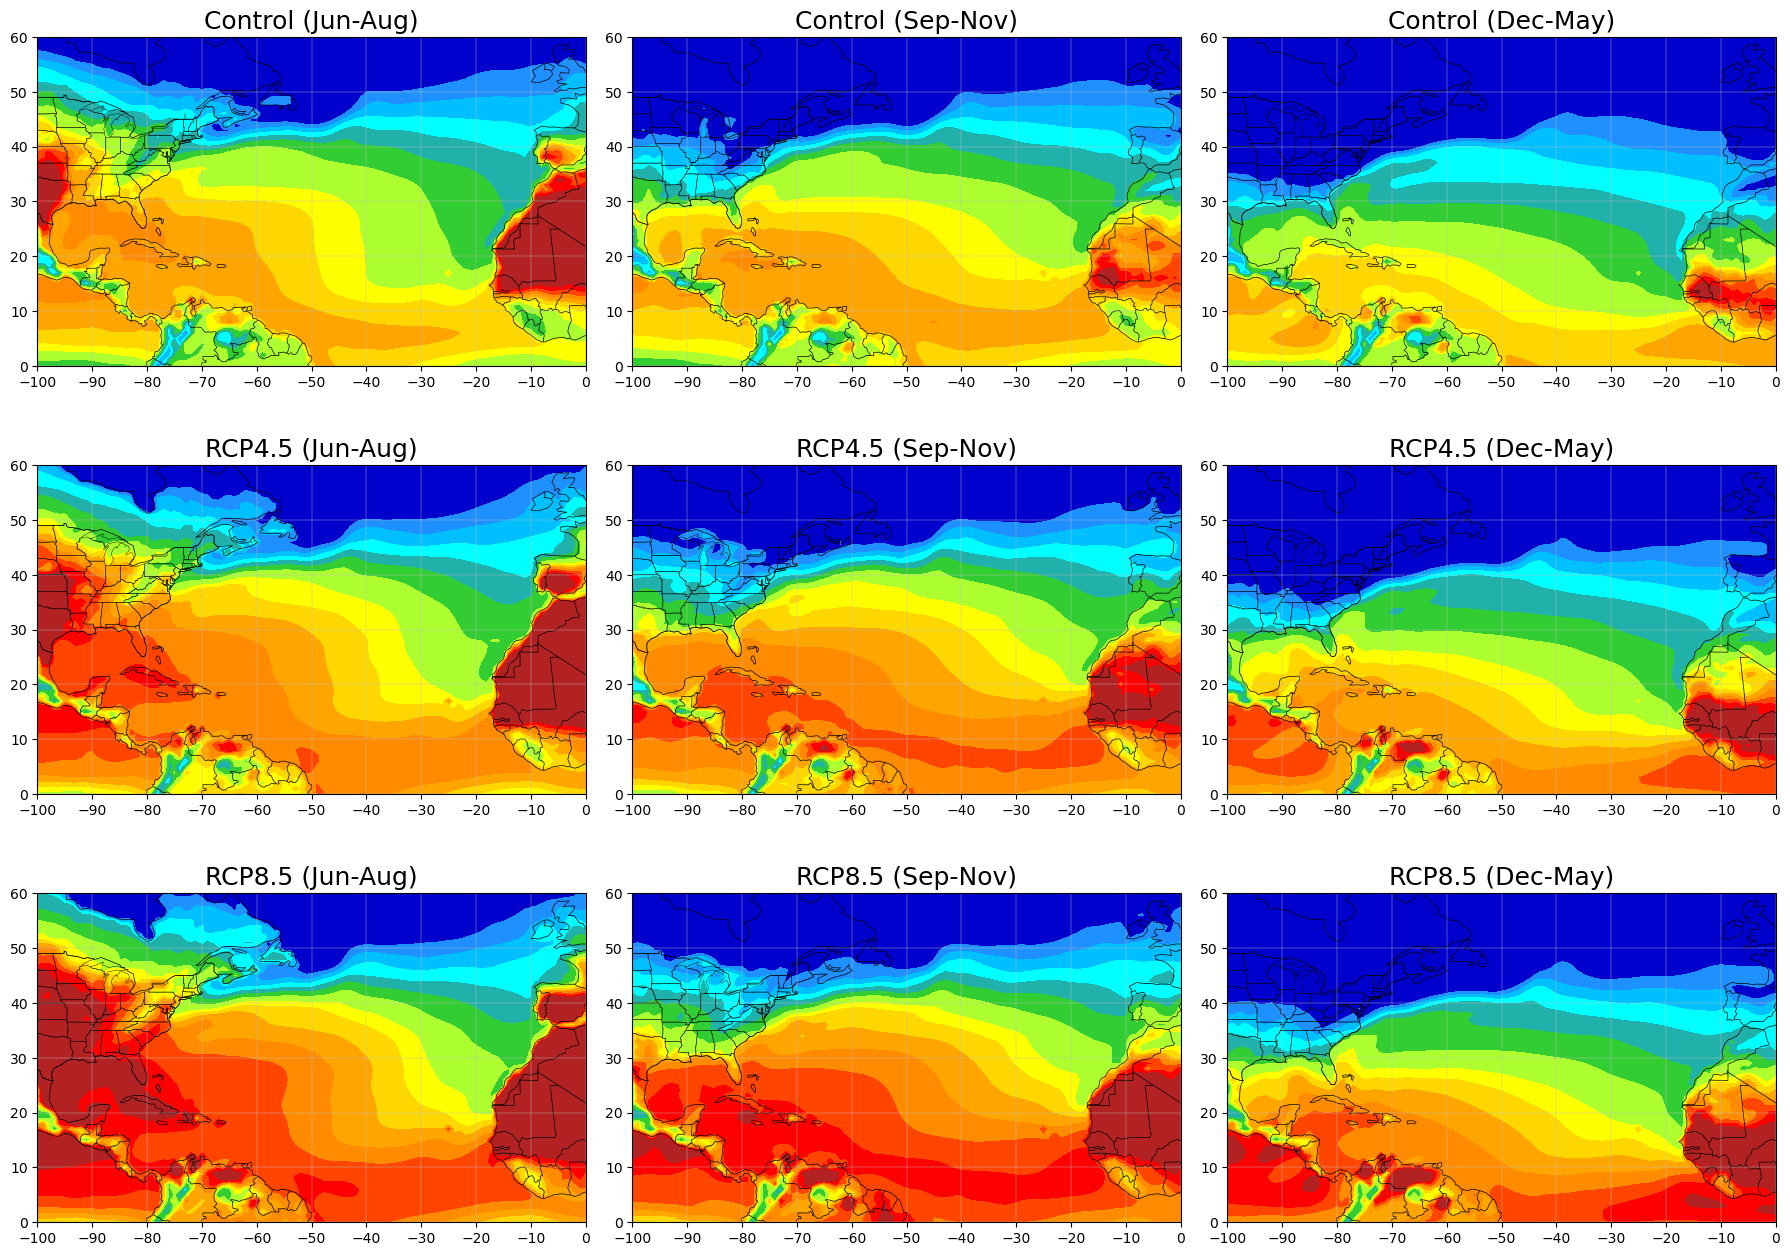

In [124]:
Variable_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, ['Jun-Aug', 'Sep-Nov', 'Dec-May'], 'TS', 100000, \
Temp_Bounds, Temp_Colours, Temp_Diff_Bounds, Temp_Diff_Colours, False)

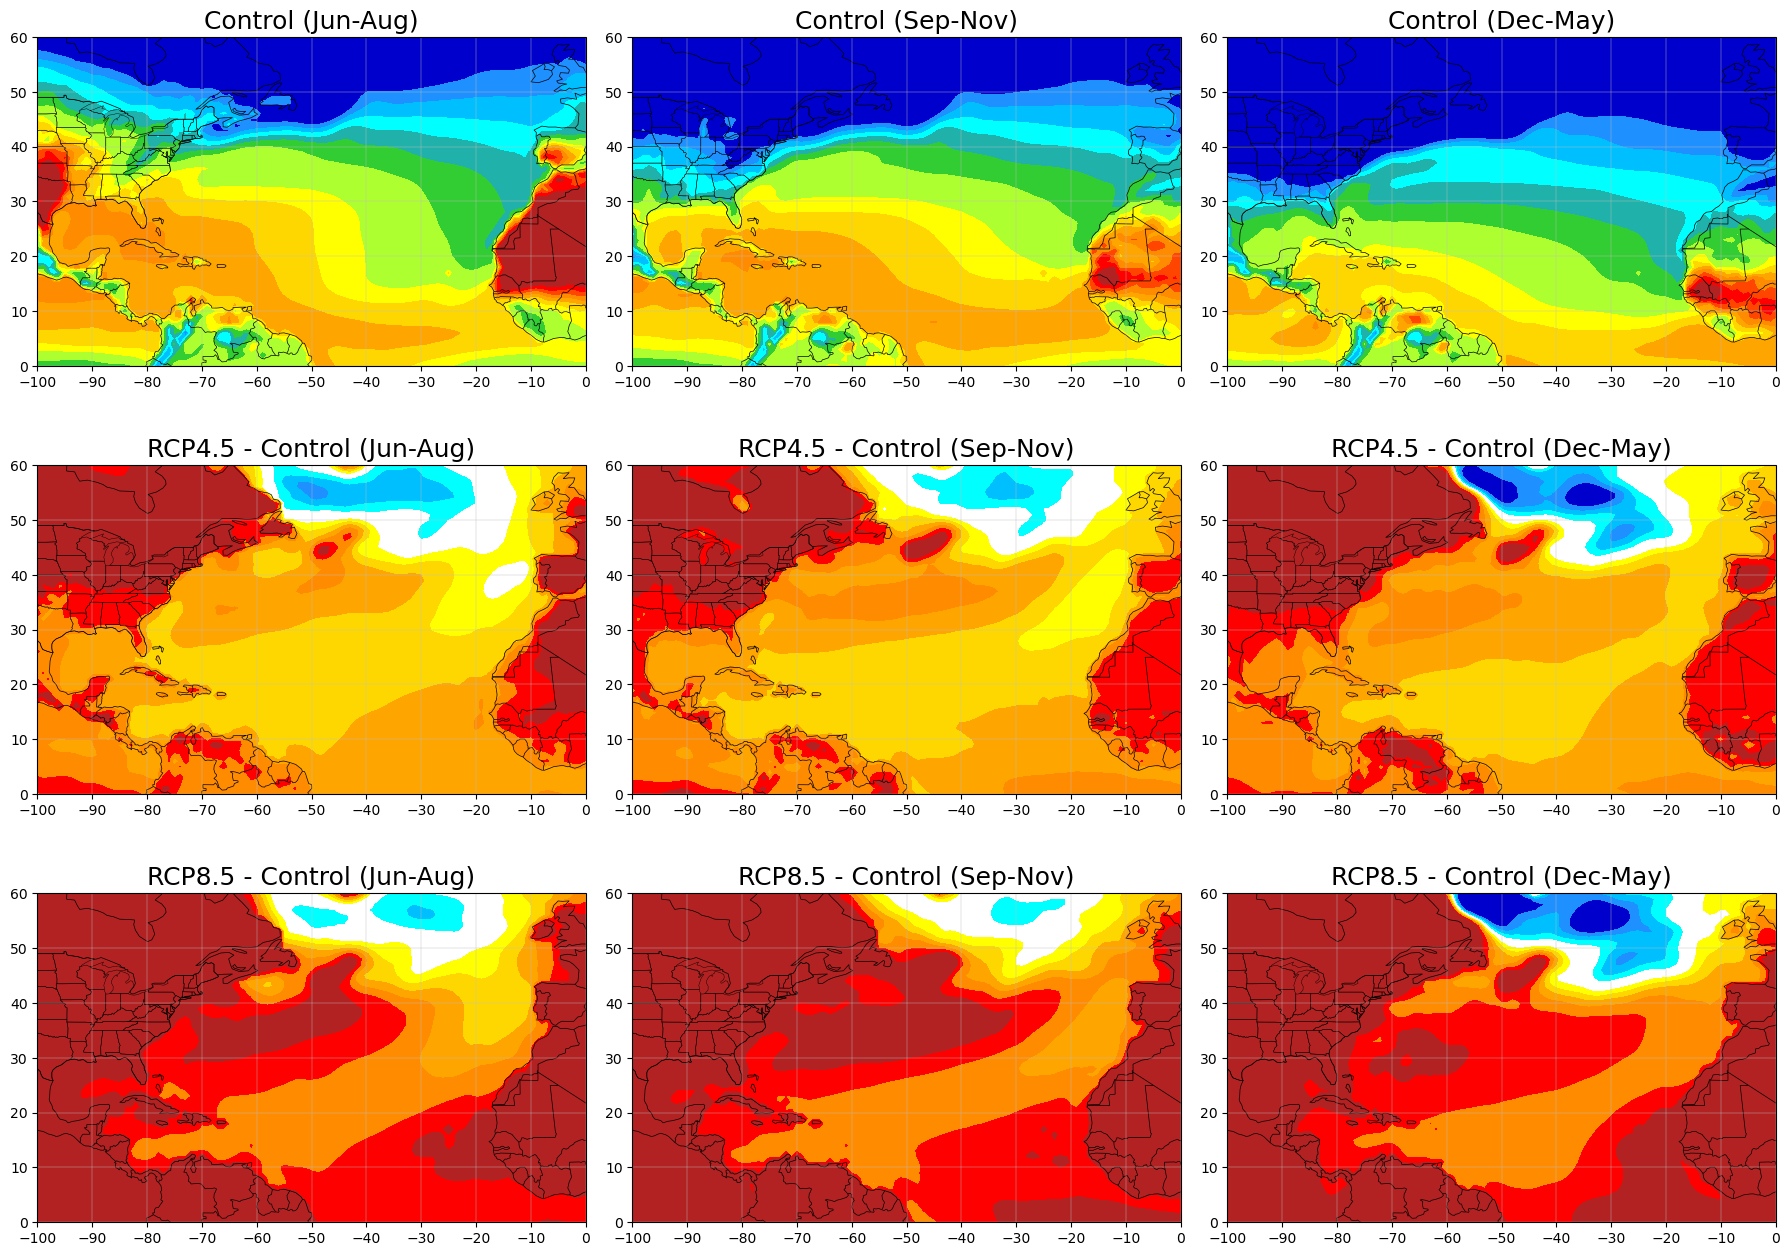

In [125]:
Variable_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, ['Jun-Aug', 'Sep-Nov', 'Dec-May'], 'TS', 100000, \
Temp_Bounds, Temp_Colours, Temp_Diff_Bounds, Temp_Diff_Colours, True)